In [5]:
import requests
from urllib.request import urlopen

from bs4 import BeautifulSoup # HTTP Response ->   HTML

import pandas as pd
from datetime import datetime
import time
import re

In [6]:
# https://search.naver.com/search.naver?where=news&sm=tab_jum&query=데이터분석
# 분석할 주소 주소창에 공백을 두고 복사하면 한글이 안깨짐(아스키코드 처리)

In [7]:
# 뉴스 검색 결과에서 네이버뉴스 추려내기

query = '데이터분석'
url = "https://search.naver.com/search.naver?where=news&query=" + query

In [8]:
web = urlopen(url)
print(url) # url에 한글이 껴 있을 경우 에러가 뻥

UnicodeEncodeError: 'ascii' codec can't encode characters in position 35-39: ordinal not in range(128)

b'<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="\xeb\x8d\xb0\xec\x9d\xb4\xed\x84\xb0\xeb\xb6\x84\xec\x84\x9d : \xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\x89\xb4\xec\x8a\xa4\xea\xb2\x80\xec\x83\x89"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'\xeb\x8d\xb0\xec\x9d\xb4\xed\x84\xb0\xeb\xb6\x84\xec\x84\x9d\'\xec\x9d\x98 \xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\x89\xb4\xec\x8a\xa4\xea\xb2\x80\xec\x83\x89 \xea\xb2\xb0\xea\xb3\xbc\xec\x9e\x85\xeb\x8b\x88\xeb\x8b\xa4."> <meta name="description" lang="ko" content="\'\xeb\x8d\xb0\xec\x9d\xb4\xed\x84\xb0\xeb\xb6\x84\xec\x84\x9d\'\xec\x9d\x98 \xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\x89\xb4\xec\x8a\xa4\x
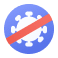
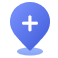
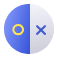
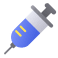

In [9]:
web = requests.get(url).content
print(web)

In [12]:
# get <- HTTP Requesr 중 GET method requesr (GET / POST / PUT / DELETE)

web = requests.get(url).content
source = BeautifulSoup(web,'html.parser')
# print(source) 그대로 출력할 경우, 텍스트가 많아서 버벅임

In [13]:
# find

news_subjects = source.find_all('a', {'class':'news_tit'}) # ResultSet

subject_list = []

for subject in news_subjects:
    subject_list.append(subject.get_text())
    
print(subject_list)

['‘깡통전세 막아라’…전·월세 데이터 공개로 세입자 권리 보장한다', '교보생명, 연세대와 AI빅데이터 관련 인재 육성', '에이텐, KB그룹 데이터 한 화면에 모았다', '제주도, 3차원 데이터 기반 소방 현장대응시스템 추진', '교보생명, 연세대에 빅데이터 석사과정 개설…전문인력 본격 양성', '세종시, 제3회 빅데이터 분석 시민 아이디어 공모전 개최', "데이터 기반 웹툰제작사 '오늘의웹툰', 21억 투자 추가유치", '[CEO포커스] 이호재 KT넥스알 대표, AI·빅데이터 분석 서비스 강화', "충남교육청, '교육 빅데이터 분석'해 미래교육 강화한다", '네이버 초거대AI, 사용자 데이터로 맞춤 언어모델 지원']


In [17]:
# 뉴스 안으로 들어가서 본문의 내용 활용

urls = news_subjects
first_article = urls[0]

first_article.attrs['href']

'http://news.heraldcorp.com/view.php?ud=20220823000059'

In [19]:
for urls in source.find_all('a',{'class' : 'news_tit'}):
    #print(urls.attrs['href'])
    print(urls['href']) # 동일

http://news.heraldcorp.com/view.php?ud=20220823000059
http://www.fnnews.com/news/202208231056087831
https://zdnet.co.kr/view/?no=20220823161841
http://www.newsis.com/view/?id=NISX20220822_0001985888&cID=10813&pID=10800
https://economist.co.kr/2022/08/23/finance/insurance/20220823100259862.html
http://www.etnews.com/20220822000086
https://www.yna.co.kr/view/AKR20220822098200005?input=1195m
http://moneys.mt.co.kr/news/mwView.php?no=2022082216353375435
https://www.nocutnews.co.kr/news/5805226
https://www.ajunews.com/view/20220823182930911


In [ ]:
# 각 뉴스 페이지 마다 소스 코드가 다르다!
# 언론사에 맞는(웹페이지 별로) if문으로 체크한 후 해당하는
# 언론사의 맞는 함수로 또 빼주어야 한다.
# 네이버 뉴스는 자체 플랫폼으로 옮겨 놓아 다행이다.

In [21]:
for urls in source.find_all('a',{'class' : 'info'}):
    if len(urls.attrs['class']) == 1:
        print(urls.attrs['href'])

https://n.news.naver.com/mnews/article/016/0002031577?sid=101
https://n.news.naver.com/mnews/article/014/0004887165?sid=101
https://n.news.naver.com/mnews/article/092/0002266114?sid=105
https://n.news.naver.com/mnews/article/003/0011375625?sid=102
https://n.news.naver.com/mnews/article/243/0000029989?sid=101
https://n.news.naver.com/mnews/article/030/0003038506?sid=102
https://n.news.naver.com/mnews/article/001/0013390153?sid=103
https://n.news.naver.com/mnews/article/417/0000845176?sid=105
https://n.news.naver.com/mnews/article/079/0003677014?sid=102


In [24]:
sample_url = 'https://n.news.naver.com/mnews/article/079/0003677014?sid=102'
sample_url.startswith('https://n.news.naver.com/')

True

In [28]:
urls_list = [] # 네이버뉴스 링크만 모아낼 리스트

for urls in source.find_all('a',{'class' : 'info'}):
    if urls.attrs['href'].startswith('https://n.news.naver.com/'):
        urls_list.append(urls.attrs['href'])

urls_list

['https://n.news.naver.com/mnews/article/016/0002031577?sid=101',
 'https://n.news.naver.com/mnews/article/014/0004887165?sid=101',
 'https://n.news.naver.com/mnews/article/092/0002266114?sid=105',
 'https://n.news.naver.com/mnews/article/003/0011375625?sid=102',
 'https://n.news.naver.com/mnews/article/243/0000029989?sid=101',
 'https://n.news.naver.com/mnews/article/030/0003038506?sid=102',
 'https://n.news.naver.com/mnews/article/001/0013390153?sid=103',
 'https://n.news.naver.com/mnews/article/417/0000845176?sid=105',
 'https://n.news.naver.com/mnews/article/079/0003677014?sid=102']